<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 1\Scripts\data_preprocessor.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  messy_data_impute[col].fillna(messy_data_impute[col].median(), inplace=True)
d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 1\Scripts\data_preprocessor.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

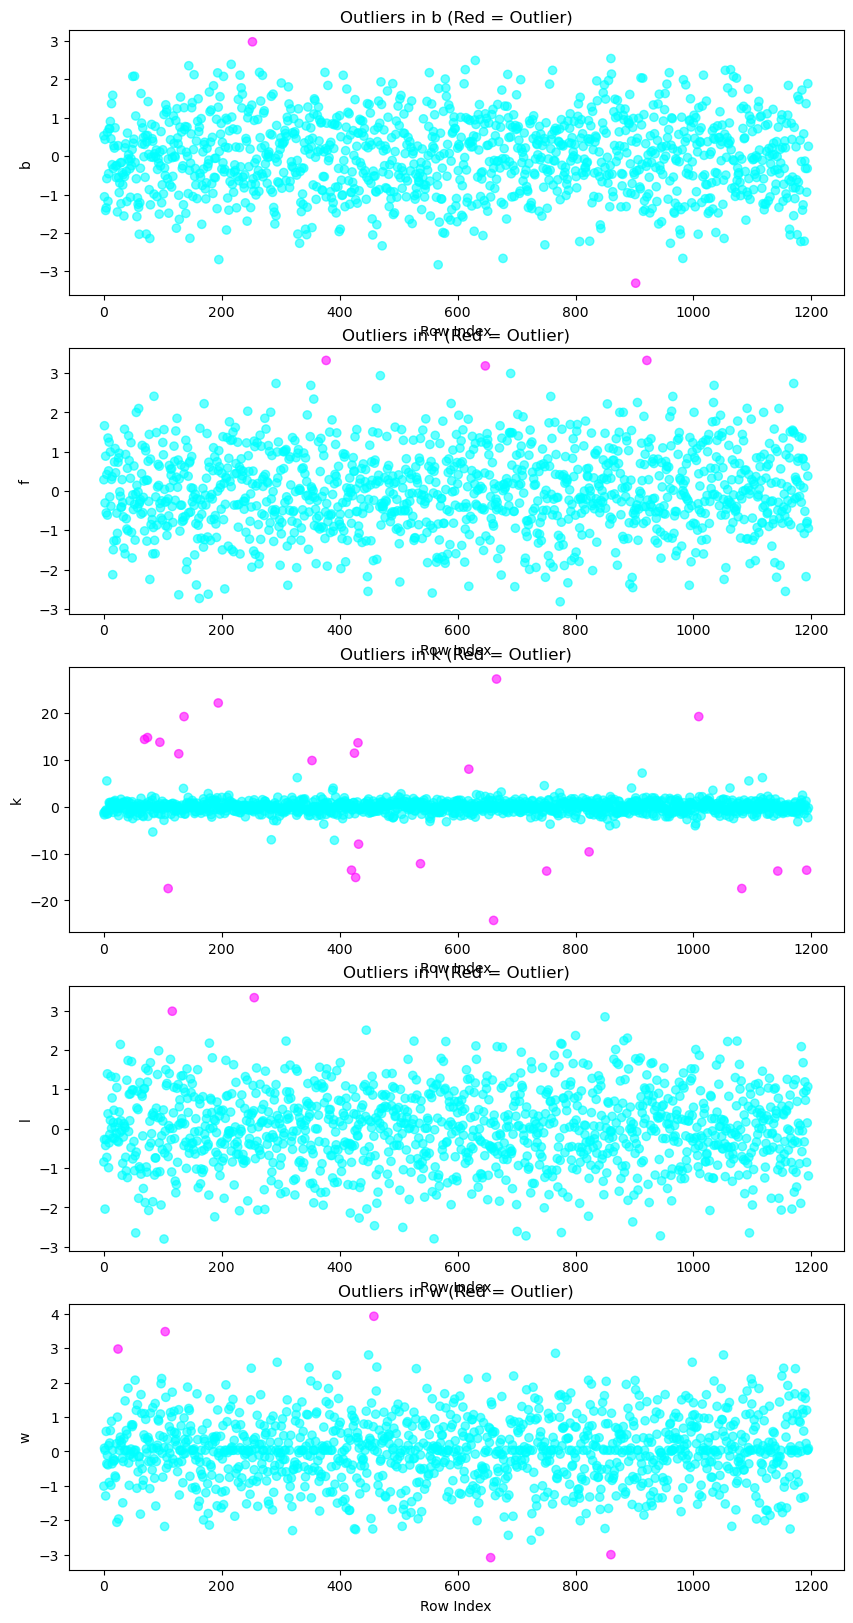

In [5]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()
clean_data.info()


# 2. Preprocess the data


clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.remove_cols_percent_missing(clean_data, percent_missing= 25)
clean_data = dp.impute_missing_values(clean_data, strategy='median')
clean_data = dp.remove_redundant_features(clean_data)
clean_data = dp.remove_outliers(clean_data)
clean_data = dp.normalize_data(clean_data)


clean_data.info()

# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

# 4. Train and evaluate the model
dp.simple_model(clean_data)